# Introduction

This project uses Clustering as a method to identify groups of stocks based on their movements, that otherwise would be undetectable. In portfolio management it is common practice to avoid companies from the same sector because they are expected to behave similarly but there may still be individual stocks or groups that don’t follow their respective sectors but others or individual stocks. 
To identify this phenomenon Partitioning Clustering algorithm k-means and Agglomerative Clustering are used. Different parameters (number of clusters, linkage criterions, etc.) are used throughout the project to improve clustering quality. Clustering quality is evaluated both quantitatively with the average silhouette score measure and heuristically by visually inspecting the corresponding scatter plots and also by comparing the labels produced with each stock’s respective sector. The best overall clustering should result should provide separated and cohesive clusters (Silhouette score closer to 1) while also having assigned same sector stocks to the same label. 
Such a result should provide insights both by helping observe sectors that “move” (either increase or decrease in terms of price) together but also stocks that behave differently than their respective sectors.

## Importing and wrangling the data:

The Dataset is constructed by picking the five stocks per sector, for the sectors Commercial Services, Communications, Consumer Durables, Consumer Services, Electronic Technology, Finance, Health Services, Industrial Services, Producer Manufacturing, Retail Trade, Technology Services, with the biggest market capitalization (as listed in https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/) taken from Yahoo Finance for 5 years using pandas datareader.

Then open and close rates are extracted from the data as numpy arrays and transposed to form row vectors.
Finaly another numpy array with the movements of the stocks is created.

### Functions needed for the project

Four functions are defined to help better abstract the code.

plot_clusters : plots clusters on a scatter plot coloring them based on cluster label.

add_sectors : adds sector column to the data after clustering by merging the labeled data with sectors dataframe

elbow : plots the elbow method of kmeans clustering evaluation to help identify the best k for the provided dataset.

silhouette: prints the average silhouette method of kmeans or agglomerative for each number of clusters on a given dataset.

In [1]:
#import needed libraries
from pandas_datareader import data as wb
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn import metrics
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')

In [2]:
def plot_clusters(data, labels, title) :
    """ plot clusters on a scatter plot.
        data: data provided for the plot
        labels: labels predicted from Clustering algorithm
        title : title of the plot """
    plt.scatter(data[:, 0], data[:, 1], c = labels, s=50, cmap='viridis')
    plt.title(title);

In [3]:
def add_sectors(cluster_labels):
    """add respective sectors to each company in the dataframe 
        by merging the dataframe with the sectors dataframe
        cluster_labels : cluster labels after prediction"""
    
    # create a DataFrame aligning labels & companies
    df = pd.DataFrame({'labels': cluster_labels, 'companies': companies})
    
    #add sectors to the dataframe
    df = pd.merge(df, sectors, 
                          left_index = True,
                          right_index = True)

    # drop duplicate columns and rename companies column
    full_df = df.drop(columns = 'companies_y').rename(columns = {'companies_x' : 'companies'})
    return full_df.sort_values(['labels','sector']);

In [4]:
def elbow(data):

    """Elbow method used to find the best k for each case
        data: data before or after preprocessing"""

    sse = []
    list_k = list(range(1, 10))

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit((data))
        sse.append(km.inertia_)

    # Plot sse against k
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance');

In [5]:
#Average silhouette method to evaluate and find the best k for kmeans
#define range of k that is going to be tested (2-10)
range_n_clusters = [2, 3, 4, 5, 6, 7 ,8 , 9 ,10]

def silhouette(dataset, algorithm):
    """Average silhouette method used to find the best k for each case
        dataset: data before or after preprocessing
        algorithm: either kmeans by passing 'k' or agglomerative by passing 'a' to select the proper clusterer"""
    
    for n_clusters in range_n_clusters:
    
            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
        if algorithm == 'k':
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.fit_predict(dataset)
        
        elif algorithm == 'a':
            clusterer = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
            cluster_labels = clusterer.fit_predict(dataset)
        else:
            print("Wrong algorithm. Please chose either kmeans or agglomerative")
        
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,);

### Data collection

The Dataset is constructed by picking the five stocks per sector, for the sectors Commercial Services, Communications, Consumer Durables, Consumer Services, Electronic Technology, Finance, Health Services, Industrial Services, Producer Manufacturing, Retail Trade, Technology Services, with the biggest market capitalization (as listed in https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/) taken from Yahoo Finance for 5 years using pandas datareader.

In [6]:
# define a dictionary of stocks to download
companies_dict = { 
'S&P GLOBAL INC': 'SPGI', 'MOODYS CORP': 'MCO', 'RELX PLC SPON ADS': 'RELX', 'THOMSON-REUTERS CORP': 'TRI',
'COPART INC': 'CPRT', 'VERIZON COMMUNICATIONS': 'VZ', 'AT&T INC': 'T', 'CHINA MOBILE INC': 'CHL',
'T-MOBILE US INC': 'TMUS', 'VODAFONE GROUP SPON': 'VOD', 'WALT DISNEY COMPANY': 'DIS', 'NETFLIX INC': 'NFLX',
'COMCAST CORP': 'CMCSA', 'MCDONALDS CORPORATION': 'MCD', 'CHARTER COMMUNICATIONS INC': 'CHTR',
'APPLE INC': 'AAPL', 'INTEL CORP': 'INTC', 'TAIWAN SEMICONDUCTOR MANUFACTURING': 'TSM', 'NVIDIA CORP': 'NVDA', 
'BROADCOM INC': 'AVGO', 'BERKSHIRE HATHAWAY INC': 'BRK-A', 'VISA INC': 'V', 'MASTERCARD INC': 'MA', 
'JPMORGAN CHASE & CO': 'JPM', 'BANK OF AMERICA CORPORATION': 'BAC', 'UNITEDHEALTH GROUP INC': 'UNH',
'ANTHEM INC': 'ANTM', 'CIGNA CORPORATION': 'CI', 'HUMANA INC': 'HUM', 'CENTENE CORPORATION': 'CNC',
'ENBRIDGE INC': 'ENB', 'WASTE MANAGEMENT INC': 'WM', 'ENTERPRISE PRODS PARTNERS L P': 'EPD',
'TC ENERGY CORPORATION': 'TRP', 'KMIDKINDER MORGAN INC': 'KMI', 'ASML HOLDING': 'ASML',
'HONEYWELL INTERNATIONAL INC': 'HON', '3M COMPANY': 'MMM', 'CATERPILLAR INC': 'CAT', 'ILLINOIS TOOL WORKS INC': 'ITW',
'AMAZON COM': 'AMZN', 'ALIBABA GROUP HOLDINGS': 'BABA', 'WALMART INC': 'WMT', 'HOME DEPOT INC': 'HD',
'COSTCO WHOLESALE CORP': 'COST', 'MICROSOFT CORP': 'MSFT', 'ALPHABET INC (GOOGLE) CLASS A': 'GOOGL',
'ALPHABET INC (GOOGLE) CLASS C': 'GOOG', 'FACEBOOK INC': 'FB', 'CISCO SYSTEMS INC': 'CSCO','TOYOTA MOTOR CORP': 'TM',
'TESLA INC': 'TSLA', 'SONY CORP': 'SNE', 'ACTIVISION BLIZZARD INC': 'ATVI','HONDA MOTOR CO': 'HMC',
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [7]:
#Check the dictionary
print(companies)

[('APPLE INC', 'AAPL'), ('AMAZON COM', 'AMZN'), ('ANTHEM INC', 'ANTM'), ('ASML HOLDING', 'ASML'), ('ACTIVISION BLIZZARD INC', 'ATVI'), ('BROADCOM INC', 'AVGO'), ('ALIBABA GROUP HOLDINGS', 'BABA'), ('BANK OF AMERICA CORPORATION', 'BAC'), ('BERKSHIRE HATHAWAY INC', 'BRK-A'), ('CATERPILLAR INC', 'CAT'), ('CHINA MOBILE INC', 'CHL'), ('CHARTER COMMUNICATIONS INC', 'CHTR'), ('CIGNA CORPORATION', 'CI'), ('COMCAST CORP', 'CMCSA'), ('CENTENE CORPORATION', 'CNC'), ('COSTCO WHOLESALE CORP', 'COST'), ('COPART INC', 'CPRT'), ('CISCO SYSTEMS INC', 'CSCO'), ('WALT DISNEY COMPANY', 'DIS'), ('ENBRIDGE INC', 'ENB'), ('ENTERPRISE PRODS PARTNERS L P', 'EPD'), ('FACEBOOK INC', 'FB'), ('ALPHABET INC (GOOGLE) CLASS C', 'GOOG'), ('ALPHABET INC (GOOGLE) CLASS A', 'GOOGL'), ('HOME DEPOT INC', 'HD'), ('HONDA MOTOR CO', 'HMC'), ('HONEYWELL INTERNATIONAL INC', 'HON'), ('HUMANA INC', 'HUM'), ('INTEL CORP', 'INTC'), ('ILLINOIS TOOL WORKS INC', 'ITW'), ('JPMORGAN CHASE & CO', 'JPM'), ('KMIDKINDER MORGAN INC', 'KMI'),

In [8]:
#each company with a coresponding sector is loaded from a custom excel file for later refference
sectors = pd.read_excel('DM Coursework.xlsx', sheet_name = 'sectors', index_col = 'index')
print(sectors)

                                           companies                   sector
index                                                                        
0                              ('APPLE INC', 'AAPL')    Electronic_Technology
1                             ('AMAZON COM', 'AMZN')             Retail_Trade
2                             ('ANTHEM INC', 'ANTM')          Health_Services
3                           ('ASML HOLDING', 'ASML')   Producer_Manufacturing
4                ('ACTIVISION BLIZZARD INC', 'ATVI')        Consumer_Durables
5                           ('BROADCOM INC', 'AVGO')    Electronic_Technology
6                 ('ALIBABA GROUP HOLDINGS', 'BABA')             Retail_Trade
7             ('BANK OF AMERICA CORPORATION', 'BAC')                  Finance
8                ('BERKSHIRE HATHAWAY INC', 'BRK-A')                  Finance
9                         ('CATERPILLAR INC', 'CAT')   Producer_Manufacturing
10                       ('CHINA MOBILE INC', 'CHL')           C

In [9]:
# Define yahoo as the source
data_source = 'yahoo'

# define start and end dates
start_date = '2015-01-01'
end_date = '2020-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = wb.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

### Data preparation for the initial clustering

In order to proceed with the clustering we have to calculate the movements of each stock per day since these are the features we will base our clustering on. To do so stock open and close values are extracted from the data, transformed to numpy arrays and transposed to row vectors. Then a new numpy array called movements is calculated by subtracting open rates from close rates. This is the main dataset that is going to be used before any preprocessing.

In [10]:
# Extract Stock Open and Close Values as indivisual variables
stock_close = panel_data['Close']
stock_open = panel_data['Open']

In [11]:
# Convert stock open and close values to numpy arrays and transpose them to row vectors
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

In [12]:
# initiate movements dataset filled with 0's
row, col = stock_close.shape
movements = np.zeros([row, col])

In [13]:
#calculate the movements
for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [14]:
#View the total of the movements
for i in range(0, len(companies)):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: APPLE INC, Change: 99.62004089355469
Company: AMAZON COM, Change: -560.0699462890625
Company: ANTHEM INC, Change: 62.11054992675781
Company: ASML HOLDING, Change: 18.6597900390625
Company: ACTIVISION BLIZZARD INC, Change: -1.1400184631347656
Company: BROADCOM INC, Change: 30.89019012451172
Company: ALIBABA GROUP HOLDINGS, Change: -133.49200439453125
Company: BANK OF AMERICA CORPORATION, Change: -0.9600305557250977
Company: BERKSHIRE HATHAWAY INC, Change: -114867.0
Company: CATERPILLAR INC, Change: -4.130016326904297
Company: CHINA MOBILE INC, Change: -23.090118408203125
Company: CHARTER COMMUNICATIONS INC, Change: 150.36988830566406
Company: CIGNA CORPORATION, Change: 14.830253601074219
Company: COMCAST CORP, Change: -5.580026626586914
Company: CENTENE CORPORATION, Change: 10.27750015258789
Company: COSTCO WHOLESALE CORP, Change: 82.8497314453125
Company: COPART INC, Change: 36.615055084228516
Company: CISCO SYSTEMS INC, Change: 2.1099681854248047
Company: WALT DISNEY COMPANY,

# K-means Clustering

The first model is going to contain 8 clusters. (Picked random arbitrary number)

In [15]:
# import Kmeans and create the 8 cluster model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, max_iter=1000, random_state=3425)

In [16]:
#fit the model and make label predictions

kmeans.fit(movements)

labels = kmeans.predict(movements)

In [17]:
#add sectors for comparison and print the labeled data

no_prep_k = add_sectors(labels)

print(no_prep_k)

    labels                                  companies                   sector
0        0                          (APPLE INC, AAPL)    Electronic_Technology
5        0                       (BROADCOM INC, AVGO)    Electronic_Technology
38       0                        (NVIDIA CORP, NVDA)    Electronic_Technology
32       0                       (MASTERCARD INC, MA)                  Finance
50       0                              (VISA INC, V)                  Finance
2        0                         (ANTHEM INC, ANTM)          Health_Services
12       0                    (CIGNA CORPORATION, CI)          Health_Services
27       0                          (HUMANA INC, HUM)          Health_Services
49       0              (UNITEDHEALTH GROUP INC, UNH)          Health_Services
3        0                       (ASML HOLDING, ASML)   Producer_Manufacturing
9        0                     (CATERPILLAR INC, CAT)   Producer_Manufacturing
35       0                          (3M COMPANY, MMM

## Evaluation of first model (k-means without preprocessing)

It is clear that the clusters generated from this dataset are of low quality since there are only two clusters that have more than one stock (0 and 7) and cluster 2 essentially has only one stock since both stocks on the dataset are offered by Alphabet Inc.

### Elbow method:

The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the Sum of squared distance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

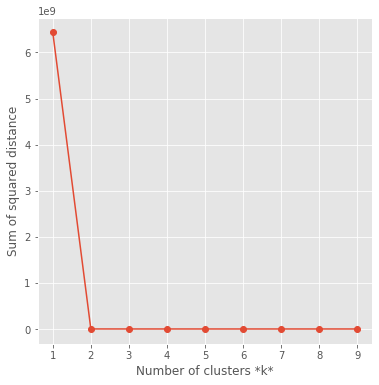

In [18]:
#Elbow method to identify the optimal k for the data pre preprocessing
elbow(movements)

By using the elbow method it is clear that for this data without applying a preprocessing techniques the optimal number of clusters is 2. This implies that based on movements stocks can be grouped into only two groups. 

### Average silhouette method

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. With the defined function we calculate the average silhouette value for the dataset.

In [19]:
#Average silhouette method for the data pre preprocessing
silhouette(movements,'k')

For n_clusters = 2 The average silhouette_score is : 0.9804201092948396
For n_clusters = 3 The average silhouette_score is : 0.7964966625352932
For n_clusters = 4 The average silhouette_score is : 0.7773461092499773
For n_clusters = 5 The average silhouette_score is : 0.6643088812781376
For n_clusters = 6 The average silhouette_score is : 0.5141670093298013
For n_clusters = 7 The average silhouette_score is : 0.42880587067349873
For n_clusters = 8 The average silhouette_score is : 0.4433381016028615
For n_clusters = 9 The average silhouette_score is : 0.33285338074043047
For n_clusters = 10 The average silhouette_score is : 0.35704237153232243


The average silhouette method confirms the findings of the elbow method.

This possibly happens because of different scales between the price movements for each stock, so normalization should be introuced to the dataset in the preproccessing step.

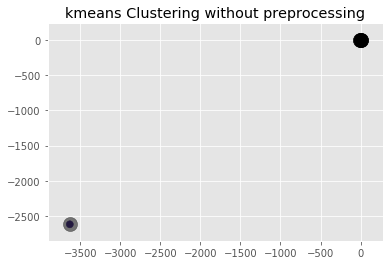

In [20]:
#plot clusters with kmeans without preprocessing
plot_clusters(movements, labels, "kmeans Clustering without preprocessing")

#Add cluster centers 
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Extrinsic evaluation is not possible since the ground truth is not available due to the nature of our experiment, but considering our ideal clusters would contain most stocks of one sector (either 4 or 3) and one or two of some other we can estimate our clustering quality by visualy inspecting the labels assigned and seeing how close our clusters fall to that distribution.

Cluster homogeneity: Extremely low. The two clusters that have more than one cluster are having too many stocks per cluster (18 and 32 respectively) to be homogenous.

Cluster completeness: The same applies here.

Rag bag: Cluster 3 is the rag bag for this try since all stocks that are not on a one stock cluster are placed on this one.

Small cluster preservation: None. All smaller clusters are broken to one stock clusters.

The dataset is difficult to plot possibly due to high dimensionality. 
This problem can be addressed with Principal Component Analysis in the preprocessing phase.


# Preprocessing

From the findings of the first run of k-means there are two possible problems that need to be fixed.
First the data have different scales so normalization should be used.
Secondly our data can't be ploted due to high dimensionality so principal component analysis should be used to reduce the dimensionality of the data.

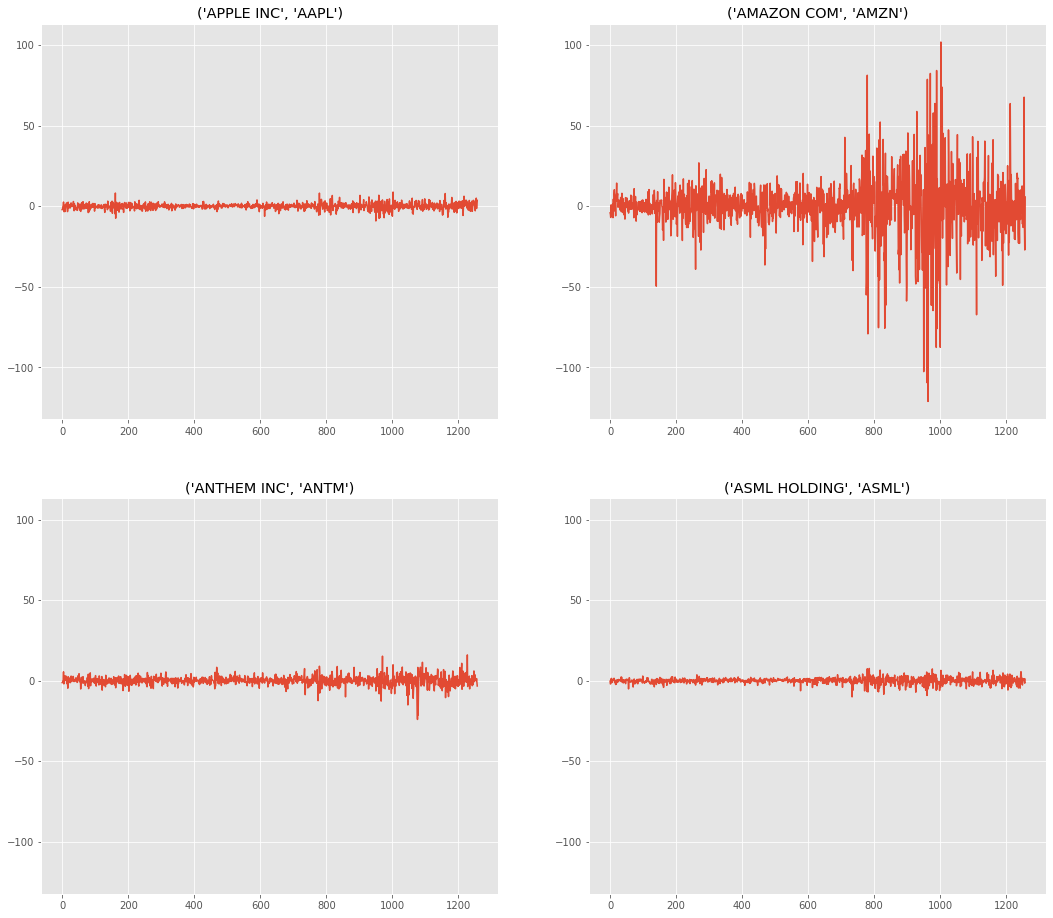

In [21]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])

plt.subplot(223, sharey=ax1)
plt.plot(movements[2][:])
plt.title(companies[2])

plt.subplot(224, sharey=ax1)
plt.plot(movements[3][:])
plt.title(companies[3])


plt.show()

It is clear that there is a big difference in scale between the price movements.
This problem can be adressed using normalization.

## Normalization

Normalization of ratings means adjusting values measured on different scales to a notionally common scale. In our case we use the normalizer function from sklearn.prepocessing module with l2 (least squares) as the norm wich is the default This normalization technique modifies the dataset values in a way that in each row the sum of the squares will always be up to 1.

In [22]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

norm_movements = normalizer.fit_transform(movements)

print(norm_movements.max())
print(norm_movements.min())
print(norm_movements.mean())

0.2798008906534835
-0.27139428410451555
0.00014690564316600433


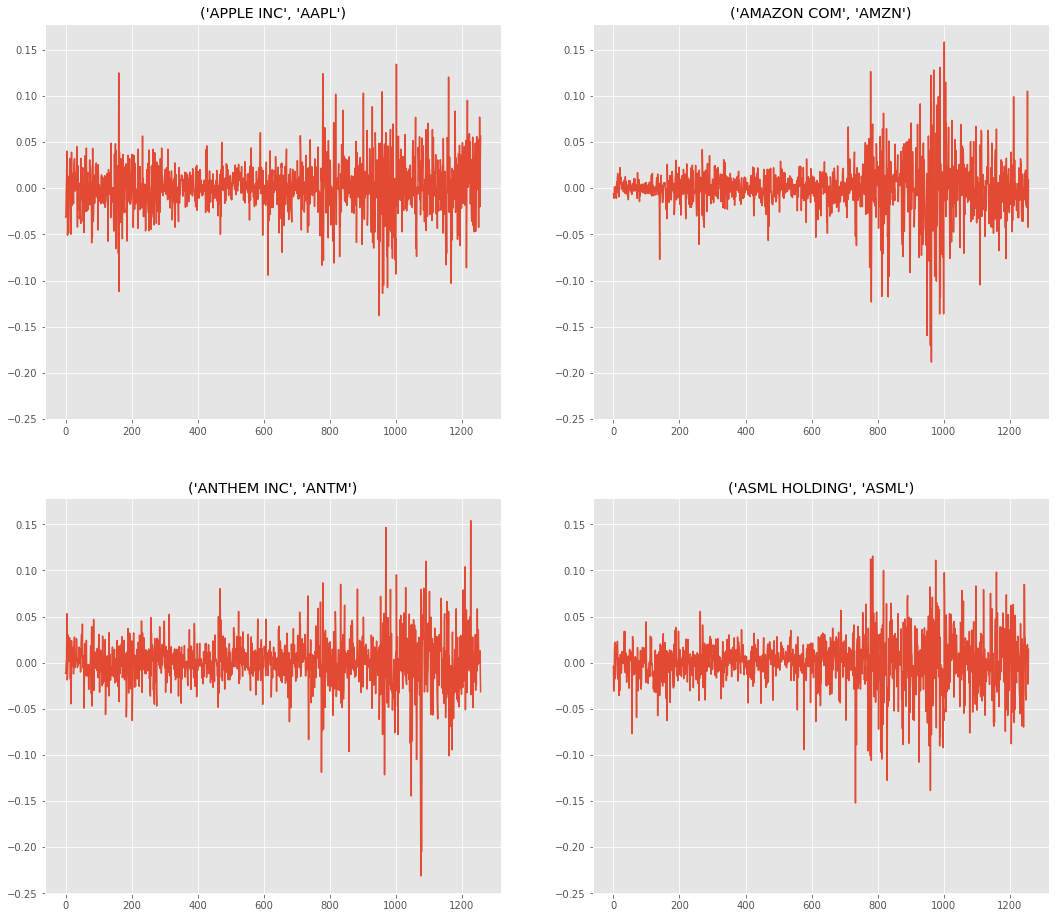

In [24]:
#plot stocks from the new data to examine the change 
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(norm_movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(norm_movements[1][:])
plt.title(companies[1])

plt.subplot(223, sharey=ax1)
plt.plot(norm_movements[2][:])
plt.title(companies[2])

plt.subplot(224, sharey=ax1)
plt.plot(norm_movements[3][:])
plt.title(companies[3])


plt.show()

As we can see we have much more even movements now that we've normalized the data

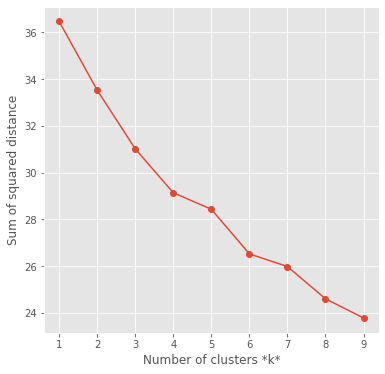

In [25]:
#Elbow method to identify the optimal k
elbow(norm_movements)

The optimal k after normalizing the data is difficult to determine with the elbow method so the average silhouette method should provide a clearer picture.

In [26]:
silhouette(norm_movements,'k')

For n_clusters = 2 The average silhouette_score is : 0.05227228250929169
For n_clusters = 3 The average silhouette_score is : 0.08080757552256983
For n_clusters = 4 The average silhouette_score is : 0.09187093825181876
For n_clusters = 5 The average silhouette_score is : 0.08084884224107071
For n_clusters = 6 The average silhouette_score is : 0.07755193178586656
For n_clusters = 7 The average silhouette_score is : 0.09060211199231082
For n_clusters = 8 The average silhouette_score is : 0.08546845790827823
For n_clusters = 9 The average silhouette_score is : 0.08597161993310025
For n_clusters = 10 The average silhouette_score is : 0.0905463484083417


For the new normalized data 4 clusters are the optimal since that k has the best average silhouette score

### k-means after normalization

In [27]:
#Predict new Cluster Labels after normalization with optimal clusters

norm_kmeans = KMeans(n_clusters = 4, random_state=3425)
norm_kmeans.fit(norm_movements)
norm_labels = norm_kmeans.predict(norm_movements)

In [28]:
#add sectors for comparison and print the labeled normalized data

normalized_k = add_sectors(norm_labels)

print(normalized_k)

    labels                                  companies                   sector
10       0                    (CHINA MOBILE INC, CHL)           Communications
42       0                              (AT&T INC, T)           Communications
44       0                    (T-MOBILE US INC, TMUS)           Communications
51       0                 (VODAFONE GROUP SPON, VOD)           Communications
52       0               (VERIZON COMMUNICATIONS, VZ)           Communications
25       0                      (HONDA MOTOR CO, HMC)        Consumer_Durables
43       0                    (TOYOTA MOTOR CORP, TM)        Consumer_Durables
11       0         (CHARTER COMMUNICATIONS INC, CHTR)        Consumer_Services
13       0                      (COMCAST CORP, CMCSA)        Consumer_Services
18       0                 (WALT DISNEY COMPANY, DIS)        Consumer_Services
7        0         (BANK OF AMERICA CORPORATION, BAC)                  Finance
8        0            (BERKSHIRE HATHAWAY INC, BRK-A

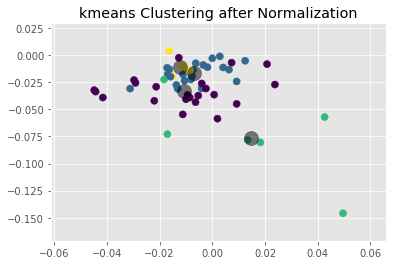

In [29]:
#plot clusters after normalization
plot_clusters(norm_movements, norm_labels, "kmeans Clustering after Normalization")

# add cluster centers
centers = norm_kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

After normalization the average silhouette score for every number of clusters decreases notably. Τhis is expected since the clusters now are closer together and on the same scale. After inspecting the labels assigned and comparing with the actual sectors it is clear that normalization helped our efforts to cluster the stocks into distinct yet dense groups.

Cluster homogeneity: Better than pre normalization. Clusters 0 and 1 have the most stocks

Cluster completeness: Vastly improved since most sectors are clustered together. Cluster 3 only contains stocks from Health Services Sector and Cluster 2 contains four out of five stocks of the Industrial Services Sector.

Rag bag: Cluster 2 contains mainly Industrial Services stocks but also two stocks from other sectors.

Small cluster preservation: Both smaller clusters are both quite pure and preserved.

Our data is still difficult to plot and examin visualy due to high dimensionality so Principal Component Analysis should reduce the complexity of the dataset so it will be easier to understand by plotting.

## Principal Component Aanalysis (PCA)

Principal component analysis (PCA) is a procedure for reducing the dimensionality of the variable space by representing it with a few orthogonal (uncorrelated) variables that capture most of its variability. Since we want to plot our data in the 2d space we chose to keep the two best components.

In [30]:
# Principal component Analysis (PCA)
from sklearn.decomposition import PCA

reduced_movements = PCA(n_components = 2).fit_transform(norm_movements)

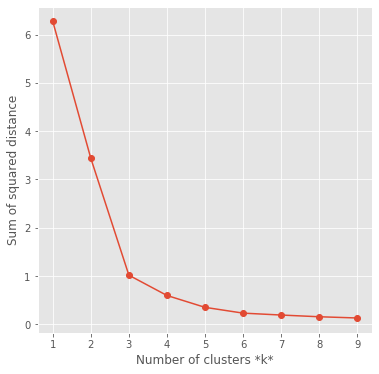

In [31]:
#Elbow method to identify the optimal k for the data after PCA
elbow(reduced_movements)

Elbow method suggests 3 clusters since this is elbow of the curve

In [32]:
silhouette(reduced_movements,'k')

For n_clusters = 2 The average silhouette_score is : 0.47639112114553755
For n_clusters = 3 The average silhouette_score is : 0.6315612460354904
For n_clusters = 4 The average silhouette_score is : 0.5216331665752453
For n_clusters = 5 The average silhouette_score is : 0.5386546008241392
For n_clusters = 6 The average silhouette_score is : 0.5670445434227801
For n_clusters = 7 The average silhouette_score is : 0.5463813458848672
For n_clusters = 8 The average silhouette_score is : 0.5534571370772053
For n_clusters = 9 The average silhouette_score is : 0.5371759392101915
For n_clusters = 10 The average silhouette_score is : 0.5129540182862216


Average silhouette score of 3 clusters is the highest so it is clear that this is the ideal number of clusters for the reduced data

### Kmeans after PCA

In [33]:
# run kmeans on reduced data
kmeans = KMeans(n_clusters = 3, random_state=3425)
kmeans.fit(reduced_movements)
pca_labels = kmeans.predict(reduced_movements)

In [34]:
#add sectors for comparison and print the labeled normalized data after pca

pca_normalized_k = add_sectors(pca_labels)

print(pca_normalized_k)

    labels                                  companies                   sector
4        0            (ACTIVISION BLIZZARD INC, ATVI)        Consumer_Durables
40       0                           (SONY CORP, SNE)        Consumer_Durables
47       0                          (TESLA INC, TSLA)        Consumer_Durables
37       0                        (NETFLIX INC, NFLX)        Consumer_Services
0        0                          (APPLE INC, AAPL)    Electronic_Technology
5        0                       (BROADCOM INC, AVGO)    Electronic_Technology
28       0                         (INTEL CORP, INTC)    Electronic_Technology
38       0                        (NVIDIA CORP, NVDA)    Electronic_Technology
48       0  (TAIWAN SEMICONDUCTOR MANUFACTURING, TSM)    Electronic_Technology
32       0                       (MASTERCARD INC, MA)                  Finance
50       0                              (VISA INC, V)                  Finance
3        0                       (ASML HOLDING, ASML

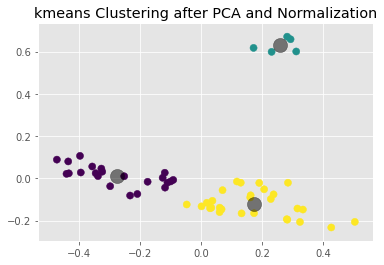

In [35]:
#plot clusters after PCA and Normalization
plot_clusters(reduced_movements, pca_labels, "kmeans Clustering after PCA and Normalization")

# add cluster centers 
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

After PCA the average silhouette score for all k’s sharply increases so this preprocessing method helps clustering in both visual clarity and clustering quality.

Cluster homogeneity: Again Health Services have their own Cluster, Cluster 1. The rest of the stocks are clustered to the other two clusters with high homogeneity.

Cluster completeness: The same applies here.

Rag bag: There is no rag bag cluster due to the low amount of clusters.

Small cluster preservation: Since there are only three clusters all small clusters are merged to clusters 0 and 2.

# Hierarchical Agglomerative Clustering

Agglomerative Hierarchical clustering takes a "bottom-up" approach on building a hierarchy of clusters. Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. This method should provide a better understanding of how similar or dissimilar the movements of the stocks are than kmeans.

In [36]:
#import Agglomerative Clustering function
from sklearn.cluster import AgglomerativeClustering

# import cluster hierarchy to produce dendograms
import scipy.cluster.hierarchy as shc

## Agglomerative Clustering without preprocessing

In [37]:
#Raw data first with 8 clusters, the sames as we initiated with k-means

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')

no_prep_agg_labels = cluster.fit_predict(movements)

In [38]:
#add sectors for comparison and print the labeled normalized data after pca

no_prep_agg = add_sectors(no_prep_agg_labels)

print(no_prep_agg)

    labels                                  companies                   sector
10       0                    (CHINA MOBILE INC, CHL)           Communications
42       0                              (AT&T INC, T)           Communications
44       0                    (T-MOBILE US INC, TMUS)           Communications
51       0                 (VODAFONE GROUP SPON, VOD)           Communications
52       0               (VERIZON COMMUNICATIONS, VZ)           Communications
4        0            (ACTIVISION BLIZZARD INC, ATVI)        Consumer_Durables
25       0                      (HONDA MOTOR CO, HMC)        Consumer_Durables
40       0                           (SONY CORP, SNE)        Consumer_Durables
43       0                    (TOYOTA MOTOR CORP, TM)        Consumer_Durables
13       0                      (COMCAST CORP, CMCSA)        Consumer_Services
18       0                 (WALT DISNEY COMPANY, DIS)        Consumer_Services
33       0               (MCDONALDS CORPORATION, MCD

Eventhough 

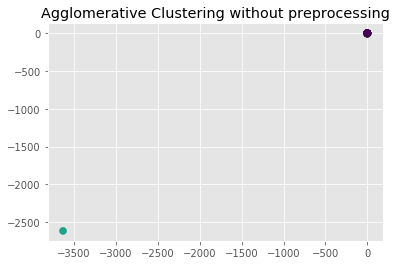

In [39]:
# Plot clusters after Agglomerative Clustering without preprocessing

plot_clusters(movements, no_prep_agg_labels, "Agglomerative Clustering without preprocessing");

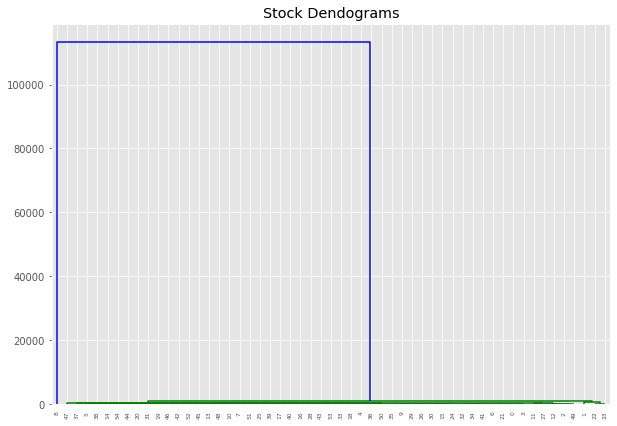

In [40]:
#dendogram to identify optimal clusters

plt.figure(figsize=(10, 7))

plt.title("Stock Dendograms")

dend = shc.dendrogram(shc.linkage(movements, method='ward'))

It is clear from the dendogram that one cluster is highly dissimillar from the rest so normalization and PCA should indeed help us better comprehend our dataset. 

In [41]:
silhouette(movements,'a')

For n_clusters = 2 The average silhouette_score is : 0.9804201092948396
For n_clusters = 3 The average silhouette_score is : 0.7964966625352932
For n_clusters = 4 The average silhouette_score is : 0.7773461092499773
For n_clusters = 5 The average silhouette_score is : 0.6643088812781376
For n_clusters = 6 The average silhouette_score is : 0.5795073603795569
For n_clusters = 7 The average silhouette_score is : 0.4601487289098544
For n_clusters = 8 The average silhouette_score is : 0.4433381016028615
For n_clusters = 9 The average silhouette_score is : 0.4511333669031164
For n_clusters = 10 The average silhouette_score is : 0.26872517505110477


The average silhouette score for each k, given the same data is the same for k= 1, 2 and 3 and higher for this algorithm than with kmeans after 4 clusters.
This means that with the movements dataset and with this method the clusters are produced with higher cohesion and separation for more clusters, so the number of clusters can be increased without giving up as much clustering quality as with kmeans.


## Agglomerative Clustering after normalization

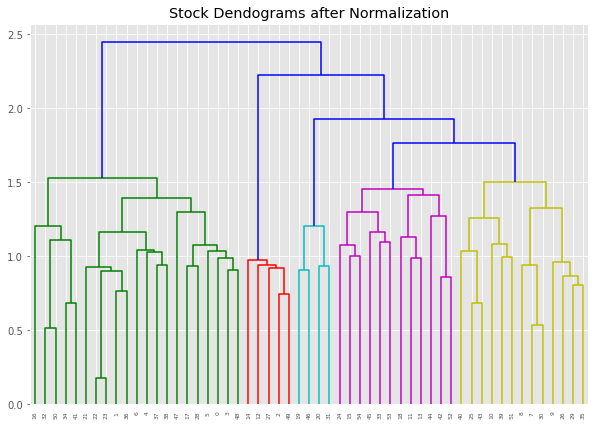

In [42]:
#dendogram to identify optimal clusters for normalized data

plt.figure(figsize=(10, 7))
plt.title("Stock Dendograms after Normalization")
dend = shc.dendrogram(shc.linkage(norm_movements, method='ward'))

The dendogram after normalizing the data suggests that 5 would be the best amount of clusters for this method.

In [43]:
silhouette(norm_movements,'a')

For n_clusters = 2 The average silhouette_score is : 0.05694051387434398
For n_clusters = 3 The average silhouette_score is : 0.08300940480780106
For n_clusters = 4 The average silhouette_score is : 0.09418265648771641
For n_clusters = 5 The average silhouette_score is : 0.08511587533288725
For n_clusters = 6 The average silhouette_score is : 0.07588505619623255
For n_clusters = 7 The average silhouette_score is : 0.07866381625901121
For n_clusters = 8 The average silhouette_score is : 0.08477195685649731
For n_clusters = 9 The average silhouette_score is : 0.0919808675590311
For n_clusters = 10 The average silhouette_score is : 0.09321185434438024


The average silhouette score for this clustering algorithm drops tenfold after normalization. Kmeans is still worse for clustering of this dataset after normalization since agglomerative clustering outperforms it in terms of average silhouette score for all values of k. Even though there is such a big drop in the clustering the clusters fall closer to the sectors that the stocks originated from. Visually the clusters are as hard to distinguish as with kmeans.

In [44]:
#predict labes
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

norm_agg_labels = cluster.fit_predict(norm_movements)

In [45]:
#add sectors for comparison and print the labeled normalized data 

norm_agg = add_sectors(norm_agg_labels)

print(norm_agg)

    labels                                  companies                   sector
10       0                    (CHINA MOBILE INC, CHL)           Communications
42       0                              (AT&T INC, T)           Communications
44       0                    (T-MOBILE US INC, TMUS)           Communications
51       0                 (VODAFONE GROUP SPON, VOD)           Communications
52       0               (VERIZON COMMUNICATIONS, VZ)           Communications
25       0                      (HONDA MOTOR CO, HMC)        Consumer_Durables
40       0                           (SONY CORP, SNE)        Consumer_Durables
43       0                    (TOYOTA MOTOR CORP, TM)        Consumer_Durables
11       0         (CHARTER COMMUNICATIONS INC, CHTR)        Consumer_Services
13       0                      (COMCAST CORP, CMCSA)        Consumer_Services
18       0                 (WALT DISNEY COMPANY, DIS)        Consumer_Services
33       0               (MCDONALDS CORPORATION, MCD

After normalization the stocks are more evenly distributed. Also the clusters fall closer to the sectors that the stocks originated from.

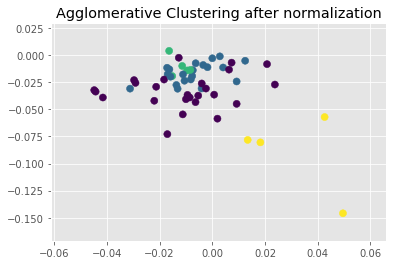

In [46]:
#visualize the clusters after normalization and Agglomerative Clustering

plot_clusters(norm_movements, norm_agg_labels, "Agglomerative Clustering after normalization") 

Cluster homogeneity: Clusters 2 and 3 are pure since they only contain stocks from one sector. 

Cluster completeness: Clusters 0 and 1 have a mix of stock from sectors not clustered as their own cluster while still containing some sectors wholly (Communications for cluster 0 and Electronic Technology and Technology Services for cluster 1).

Rag bag: Cluster 0 is the Rag Bag for this particular clustering since it seems to collect all stocks that are not on the other 3 clusters rather than picking specific sectors like the rest.

Small cluster preservation: Clusters 2 and 3 are both preserved and have only stocks of one sector (Health and Industrial Services respectively).

## Agglomerative Clustering after normalization and PCA

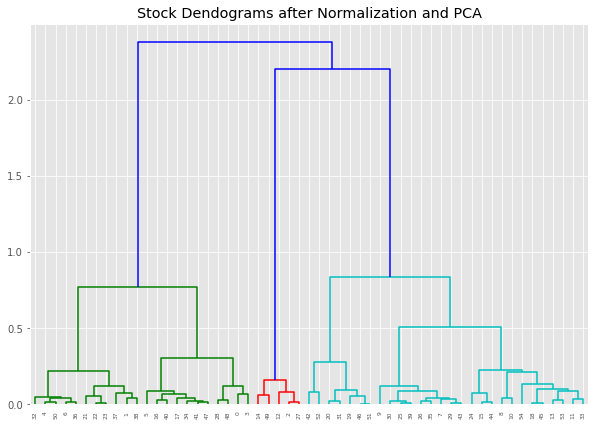

In [47]:
#dendogram to identify optimal clusters for normalized data

plt.figure(figsize=(10, 7))

plt.title("Stock Dendograms after Normalization and PCA")

dend = shc.dendrogram(shc.linkage(reduced_movements, method='ward'))

The dendogram after normalizing and reducing the data also suggests that 6 would be the best amount of clusters for this method.

In [48]:
silhouette(reduced_movements, 'a')

For n_clusters = 2 The average silhouette_score is : 0.48055668838773147
For n_clusters = 3 The average silhouette_score is : 0.6315612460354904
For n_clusters = 4 The average silhouette_score is : 0.5544761949609988
For n_clusters = 5 The average silhouette_score is : 0.5445916388535252
For n_clusters = 6 The average silhouette_score is : 0.549220798002799
For n_clusters = 7 The average silhouette_score is : 0.5406892487602357
For n_clusters = 8 The average silhouette_score is : 0.5429056146647635
For n_clusters = 9 The average silhouette_score is : 0.5345742098542655
For n_clusters = 10 The average silhouette_score is : 0.5182601565194748


After PCA the average silhouette scores for different values of k are close to those of kmeans with the same dataset. By following the dendogram we pick 6 clusters as our best value since more clusters without giving up too much average silhouette score should provide more interesting clusters.

In [49]:
#Agglomerative Clustering after normalization and PCA

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

pca_norm_agg_labels = cluster.fit_predict(reduced_movements)

In [50]:
#add sectors for comparison and print the labeled normalized data 

pca_norm_agg = add_sectors(pca_norm_agg_labels)

print(pca_norm_agg)

    labels                                  companies                   sector
40       0                           (SONY CORP, SNE)        Consumer_Durables
47       0                          (TESLA INC, TSLA)        Consumer_Durables
0        0                          (APPLE INC, AAPL)    Electronic_Technology
5        0                       (BROADCOM INC, AVGO)    Electronic_Technology
28       0                         (INTEL CORP, INTC)    Electronic_Technology
48       0  (TAIWAN SEMICONDUCTOR MANUFACTURING, TSM)    Electronic_Technology
3        0                       (ASML HOLDING, ASML)   Producer_Manufacturing
17       0                  (CISCO SYSTEMS INC, CSCO)      Technology_Services
16       0                         (COPART INC, CPRT)      Commercial_Services
34       0                         (MOODYS CORP, MCO)      Commercial_Services
41       0                     (S&P GLOBAL INC, SPGI)      Commercial_Services
42       1                              (AT&T INC, T

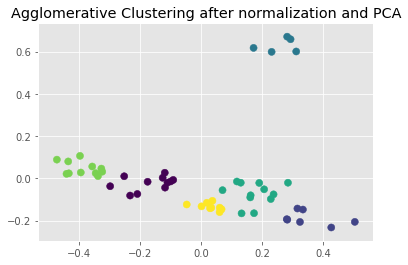

In [51]:
plot_clusters(reduced_movements, pca_norm_agg_labels, "Agglomerative Clustering after normalization and PCA") 

Cluster homogeneity: Clusters produced with this method are homogenous in terms of sectors while still containing individual stock exceptions. 

Cluster completeness: Clusters produced with this method don’t contain all stocks per sector. 

Rag bag: There is no Rag Bag cluster produced.

Small cluster preservation: Clusters produced with this specific method are have no small clusters since we chose to merge all smaller clusters until 6 are kept.

## Agglomerative Clustering Different linkage criterions

Since we concluded that our data after Normalization and PCA and Agglomerative Clustering with 6 clusters provide the best overall results for our use case we should also try different linkages to further improve the results. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. 

There are four types of linkage criterions: 

Ward: minimizes the variance of the clusters being merged (default).

Average: uses the average of the distances of each observation of the two sets.

Complete: uses the maximum distances between all observations of the two sets.

Single: uses the minimum of the distances between all observations of the two sets.

In [52]:
#Define models and predict labels for all linkage criterions
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=6)
as_comp = agg_comp.fit_predict(reduced_movements)

agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=6)
as_avg = agg_avg.fit_predict(reduced_movements)

agg_single = AgglomerativeClustering(linkage = 'single', n_clusters=6)
as_single = agg_single.fit_predict(reduced_movements)

In [53]:
#define labels as variables for all linkage criterions
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_single = agg_single.labels_

In [54]:
#calculate silhouette scores
print("For ward linkage, the average silhouette_score is :"
 ,metrics.silhouette_score(reduced_movements, pca_norm_agg_labels))

print("For single linkage, the average silhouette_score is :"
 ,metrics.silhouette_score(reduced_movements, labels_single))

print("For average linkage, the average silhouette_score is :"
 ,metrics.silhouette_score(reduced_movements,labels_avg)) 

print("For complete linkage, the average silhouette_score is :"
 ,metrics.silhouette_score(reduced_movements, labels_comp))

For ward linkage, the average silhouette_score is : 0.549220798002799
For single linkage, the average silhouette_score is : 0.493275013387496
For average linkage, the average silhouette_score is : 0.5590910488302816
For complete linkage, the average silhouette_score is : 0.549220798002799


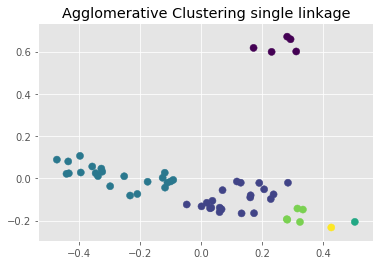

In [55]:
#plot the clusters
plot_clusters(reduced_movements, labels_single, "Agglomerative Clustering single linkage")

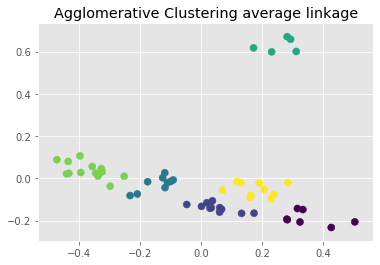

In [56]:
plot_clusters(reduced_movements, labels_avg, "Agglomerative Clustering average linkage")

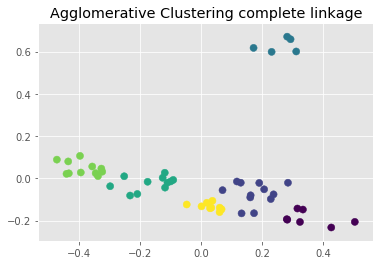

In [57]:
plot_clusters(reduced_movements, labels_comp, "Agglomerative Clustering complete linkage")

After examining the average silhouette scores and the scatter plots for the different linkage criterions it is clear that only the average linkage criterion competes with the default (ward) for our use case but still ward linkage is the superior choice. 

# Conclusions

The best overall results where produced by the dataset with Agglomerative Clustering, ward linkage criterion and stopping at 6 clusters, with the dataset produced after normalization and principal component analysis. 
Before normalization and PCA with kmeans our dataset couldn’t produce more than 2 clusters without compromising cluster quality. Agglomerative clustering could produce better clusters for the same dataset but still the results were poor for our use case and it was impossible to visually distinct the clusters due to high dimensionality of the dataset. These problems were addressed with normalization and principal component analysis. 
After normalization the average silhouette score for every number of clusters for both algorithms dropped significantly but the clusters produced from this dataset where of better use for our specific case and also the number of high quality clusters 